# Logistic Regression

## Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from numpy.random import RandomState
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris

In [2]:
data=load_iris()
X=data.data
y=data.target
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
X=X[:100,[1,3]]
y=y[:100]

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [5]:
class LogisticRegression:
    
    def __init__(self,num_iter=50,random_state=70,eta=0.01):
        self.random_state=random_state
        self.eta=eta
        self.num_iter=num_iter
        
    def fit(self,X,y,mu=0.0,sigma=0.1):
        
        errors_=0
        self.cost_ = []
        
        Initialization_=RandomState(seed=self.random_state)
        self.WeightAndBias=Initialization_.normal(loc=mu,scale=sigma,
                                                      size=1+X.shape[1])
        for _ in range(self.num_iter):
            
            dot_product_result=self.find_dot_product(X)

            sigmoid_result = self.activation(dot_product_result)
            
            errors = (y-sigmoid_result)
            
            self.WeightAndBias[1:] =self.eta * X.T.dot(errors)
            
            self.WeightAndBias[0] = self.eta * errors.sum()
            
            cost= -( np.dot(y,(np.log (sigmoid_result))) + np.dot((1-y),(np.log(1-sigmoid_result))))
            
            self.cost_.append(cost)
                                                            
        return self

    
    def find_dot_product(self,X):
        return np.dot(X,self.WeightAndBias[1:])+self.WeightAndBias[0]
    
    def activation(self,X):
        return (1 / (1 + np.exp(-X)))
                                                                
    def predict(self,X):
         return (np.where(self.activation(self.find_dot_product(X))<0.5,0.0,1.0))                                                       
        
        
        

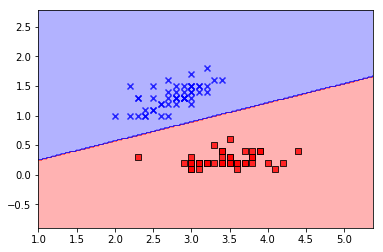

In [6]:
LR = LogisticRegression(eta=0.003525, num_iter=2000)
LR.fit(X, y)
plot_decision_regions(X, y, classifier=LR)